In [1]:
# Notebook for part 2

In [12]:
from itertools import islice

import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def create_network():
    """
    This function reads data from data folder and construct a network.

    """
    with open('data/actors.csv', 'r') as nodecsv:
        nodereader = csv.reader(nodecsv)
        nodes = [n for n in nodereader][1:]

    node_names = [n[0] for n in nodes]

    with open('data/actor_edges.csv', 'r') as edgecsv:
        edgereader = csv.reader(edgecsv)
        edges = [tuple(e) for e in edgereader][1:]

    G = nx.Graph()

    G.add_nodes_from(node_names)
    G.add_edges_from(edges)

    role_dict = {}
    number_of_movies_dict = {}
    birth_dict = {}
    awards_dict = {}
    nominee_dict = {}

    for node in nodes:  # Loop through the list, one row at a time
        role_dict[node[0]] = node[1]
        number_of_movies_dict[node[0]] = node[2]
        birth_dict[node[0]] = node[3]
        awards_dict[node[0]] = node[4]
        nominee_dict[node[0]] = node[5]

    nx.set_node_attributes(G, role_dict, 'role')
    nx.set_node_attributes(G, number_of_movies_dict, 'number_of_movies')
    nx.set_node_attributes(G, birth_dict, 'date_of_birth')
    nx.set_node_attributes(G, awards_dict, 'awards_won')
    nx.set_node_attributes(G, nominee_dict, 'awards_nominee')

    return G

In [14]:
graph = create_network()
print(graph)

Graph with 1790 nodes and 303886 edges


In [15]:
def plot_degree_distribution(graph, color='skyblue'):
    degrees = [degree for node, degree in nx.degree(graph)]
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(degrees, bins=30, density=True, color=color, edgecolor='black')

    ax.set_ylabel('Fraction p_k of nodes with degree k')
    ax.set_xlabel('Degree')

    ax.set_title('Degree Distribution Histogram')

    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Degree Distribution Histogram'}, xlabel='Degree', ylabel='Fraction p_k of nodes with degree k'>)

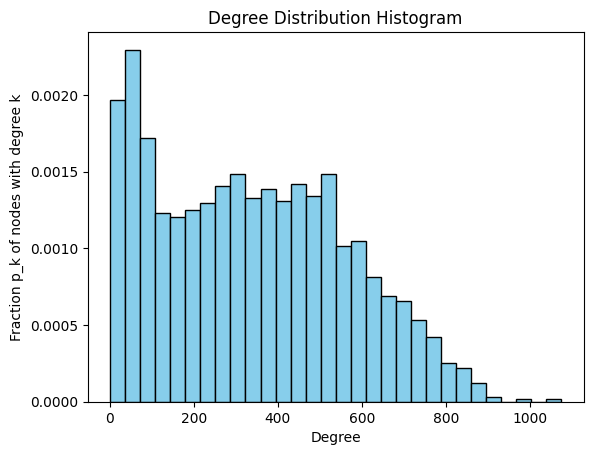

In [16]:
plot_degree_distribution(graph)

Erdos-renyi

In [17]:
def generate_er_graph(number_of_nodes, probability_of_edge):
    return nx.erdos_renyi_graph(number_of_nodes, probability_of_edge)

num_edges = len(graph.edges())
number_of_nodes = len(graph.nodes())

probability_of_edge = num_edges / (number_of_nodes * (number_of_nodes - 1) / 2)
print("Edge Probability: ", probability_of_edge)
erdos_renyi_models = [generate_er_graph(number_of_nodes, probability_of_edge) for _ in range(5)]

for i, er_graph in enumerate(erdos_renyi_models):
    print(f"Graph {i + 1} - Number of Nodes: {len(er_graph.nodes)}, Number of Edges: {len(er_graph.edges)}")
    print("is connected:", nx.is_connected(er_graph))
    print(sum(dict(er_graph.degree()).values()) / len(er_graph))

Edge Probability:  0.18979174408473884
Graph 1 - Number of Nodes: 1790, Number of Edges: 303673
is connected: True
339.2994413407821
Graph 2 - Number of Nodes: 1790, Number of Edges: 303658
is connected: True
339.2826815642458
Graph 3 - Number of Nodes: 1790, Number of Edges: 304646
is connected: True
340.38659217877097
Graph 4 - Number of Nodes: 1790, Number of Edges: 304796
is connected: True
340.55418994413407
Graph 5 - Number of Nodes: 1790, Number of Edges: 303654
is connected: True
339.2782122905028


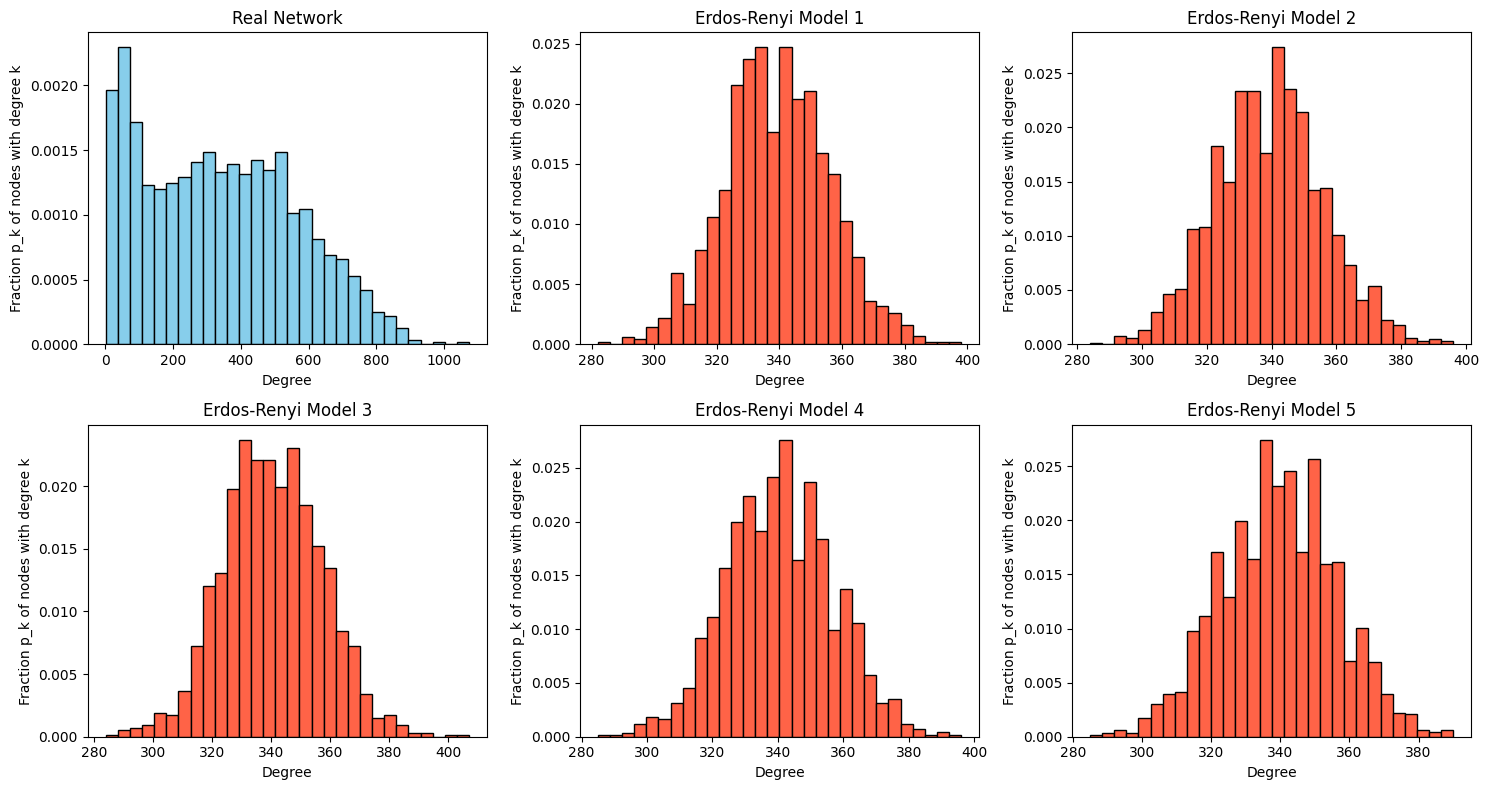

In [18]:
def plot_degree_distribution(graph, ax, color='skyblue'):
    degrees = [degree for node, degree in nx.degree(graph)]
    n, bins, patches = ax.hist(degrees, bins=30, density=True, color=color, edgecolor='black')

    ax.set_ylabel('Fraction p_k of nodes with degree k')
    ax.set_xlabel('Degree')
    ax.set_title('Degree Distribution')

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot the degree distribution for the real network
plot_degree_distribution(graph, axes[0, 0], color='skyblue')
axes[0, 0].set_title('Real Network')

# Plot the degree distributions for the Erdos-Renyi models
for i in range(1, 6):
    plot_degree_distribution(erdos_renyi_models[i-1], axes[i//3, i%3], color='tomato')
    axes[i//3, i%3].set_title(f'Erdos-Renyi Model {i}')

# Adjust layout
plt.tight_layout()

# Show the entire figure
plt.show()

In [19]:
def generate_configuration_model(real_graph):
    degrees = dict(real_graph.degree())
    configuration_model = nx.configuration_model(list(degrees.values()))
    return configuration_model

configuration_models = [generate_configuration_model(graph) for _ in range(5)]

for i, cn_graph in enumerate(configuration_models):
    print(f"Graph {i + 1} - Number of Nodes: {len(cn_graph.nodes)}, Number of Edges: {len(cn_graph.edges)}")
    print("is connected:", nx.is_connected(cn_graph))
    print(sum(dict(cn_graph.degree()).values()) / len(cn_graph))

Graph 1 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
339.5374301675978
Graph 2 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
339.5374301675978
Graph 3 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
339.5374301675978
Graph 4 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
339.5374301675978
Graph 5 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
339.5374301675978


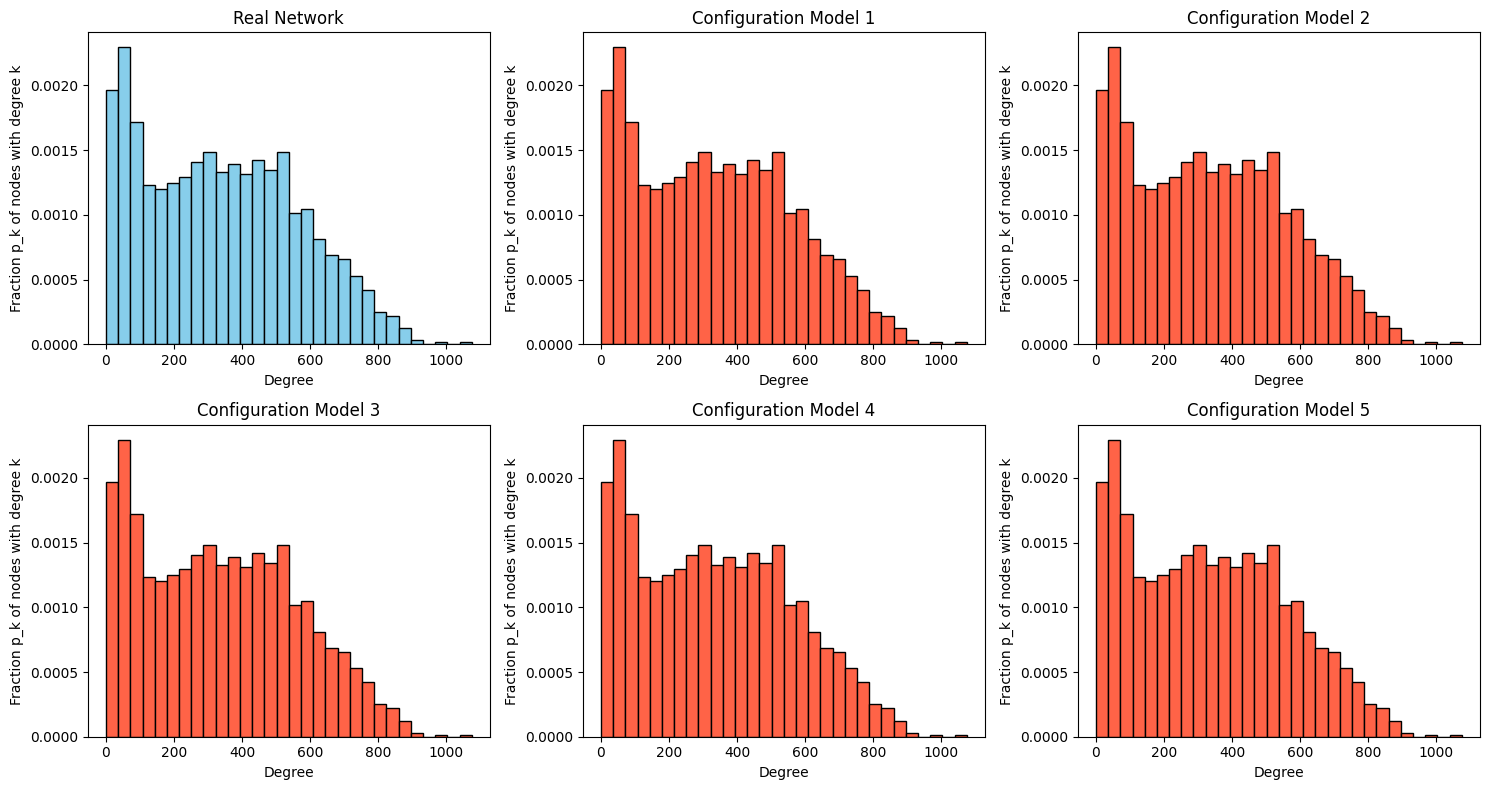

In [21]:
def plot_degree_distribution(graph, ax, color='skyblue'):
    degrees = [degree for node, degree in nx.degree(graph)]
    n, bins, patches = ax.hist(degrees, bins=30, density=True, color=color, edgecolor='black')

    ax.set_ylabel('Fraction p_k of nodes with degree k')
    ax.set_xlabel('Degree')
    ax.set_title('Degree Distribution')


fig, axes = plt.subplots(2, 3, figsize=(15, 8))

plot_degree_distribution(graph, axes[0, 0])
axes[0, 0].set_title('Real Network')

for i in range(1, 6):
    plot_degree_distribution(configuration_models[i-1], axes[i//3, i%3], color='tomato')
    axes[i//3, i%3].set_title(f'Configuration Model {i}')

# Adjust layout
plt.tight_layout()

# Show the entire figure
plt.show()
